# Importing necessary libraries and data


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
Gender                            2111 non-null object
Age                               2111 non-null float64
Height                            2111 non-null float64
Weight                            2109 non-null float64
family_history_with_overweight    2111 non-null object
FAVC                              2109 non-null object
FCVC                              2111 non-null float64
NCP                               2111 non-null float64
CAEC                              2109 non-null object
SMOKE                             2110 non-null object
CH2O                              2111 non-null float64
SCC                               2111 non-null object
FAF                               2110 non-null float64
TUE                               2111 non-null float64
CALC                              2111 non-null object
MTRANS                            2111 non-null object
NObey

# Data Preprocessing

### Filling missing values

In [4]:
df.isnull().any()

Gender                            False
Age                               False
Height                            False
Weight                             True
family_history_with_overweight    False
FAVC                               True
FCVC                              False
NCP                               False
CAEC                               True
SMOKE                              True
CH2O                              False
SCC                               False
FAF                                True
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

In [5]:
X = df.drop("NObeyesdad",axis=1)
y = df["NObeyesdad"]

In [6]:
catagorical =list( X.select_dtypes(include='object').columns )
numerical = list( X.select_dtypes(exclude='object').columns )

In [7]:
for cat in catagorical:
    df[cat].fillna(df[cat].mode()[0],inplace=True)

In [8]:
for num in numerical:
    df[num].fillna(df[num].mean(),inplace=True)

In [9]:
df.isnull().any()

Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

In [10]:
df_new=df.copy(deep=True)

# Label Encoding and One Hot encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df_new["NObeyesdad"]=le.fit_transform(df_new["NObeyesdad"])

In [42]:
print("Encoding of output columnn")
print(pd.DataFrame(pd.Series(le.inverse_transform([0,1,2,3,4,5,6])),columns=["Class Names indexed with class labels"]))

Encoding of output columnn
  Class Names indexed with class labels
0                   Insufficient_Weight
1                         Normal_Weight
2                        Obesity_Type_I
3                       Obesity_Type_II
4                      Obesity_Type_III
5                    Overweight_Level_I
6                   Overweight_Level_II


In [43]:
for cat in catagorical:
    d=pd.get_dummies(df_new[cat],prefix=str(cat),drop_first=True)
    df_new.drop(cat,axis="columns",inplace=True)
    df_new=pd.concat([df_new,d],axis="columns")

In [44]:
df_new.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0,1,1,0,1,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,5,1,...,0,0,0,1,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,6,1,...,0,0,0,0,1,0,0,0,1,0


# Scaling 

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc=StandardScaler()
df_scaled=pd.DataFrame(sc.fit_transform(df_new.drop("NObeyesdad",axis=1)),columns=df_new.drop("NObeyesdad",axis=1).columns)

In [47]:
df_scaled.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.522124,-0.875589,-0.862503,-0.785019,0.404153,-0.013073,-1.187869,0.561997,-1.011914,0.472291,...,-0.157344,-0.145900,-0.218272,-0.185194,-1.404720,1.517761,-0.05768,-0.072375,0.579721,-0.165078
1,-0.522124,-1.947599,-1.168066,1.088342,0.404153,1.618759,2.341053,-1.080625,-1.011914,0.472291,...,-0.157344,6.853997,4.581439,-0.185194,0.711885,-0.658865,-0.05768,-0.072375,0.579721,-0.165078
2,-0.206889,1.054029,-0.365964,-0.785019,0.404153,-0.013073,1.164746,0.561997,0.988227,0.472291,...,-0.157344,-0.145900,-0.218272,5.399735,-1.404720,-0.658865,-0.05768,-0.072375,0.579721,-0.165078
3,0.423582,1.054029,0.015989,1.088342,0.404153,-0.013073,1.164746,-1.080625,0.988227,-2.117337,...,-0.157344,-0.145900,-0.218272,5.399735,-1.404720,-0.658865,-0.05768,-0.072375,-1.724969,6.057758
4,-0.364507,0.839627,0.122935,-0.785019,-2.167023,-0.013073,-1.187869,-1.080625,0.988227,-2.117337,...,-0.157344,-0.145900,-0.218272,-0.185194,0.711885,-0.658865,-0.05768,-0.072375,0.579721,-0.165078


In [48]:
X = df_scaled
y = df_new["NObeyesdad"]

In [49]:
X.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.522124,-0.875589,-0.862503,-0.785019,0.404153,-0.013073,-1.187869,0.561997,-1.011914,0.472291,...,-0.157344,-0.145900,-0.218272,-0.185194,-1.404720,1.517761,-0.05768,-0.072375,0.579721,-0.165078
1,-0.522124,-1.947599,-1.168066,1.088342,0.404153,1.618759,2.341053,-1.080625,-1.011914,0.472291,...,-0.157344,6.853997,4.581439,-0.185194,0.711885,-0.658865,-0.05768,-0.072375,0.579721,-0.165078
2,-0.206889,1.054029,-0.365964,-0.785019,0.404153,-0.013073,1.164746,0.561997,0.988227,0.472291,...,-0.157344,-0.145900,-0.218272,5.399735,-1.404720,-0.658865,-0.05768,-0.072375,0.579721,-0.165078
3,0.423582,1.054029,0.015989,1.088342,0.404153,-0.013073,1.164746,-1.080625,0.988227,-2.117337,...,-0.157344,-0.145900,-0.218272,5.399735,-1.404720,-0.658865,-0.05768,-0.072375,-1.724969,6.057758
4,-0.364507,0.839627,0.122935,-0.785019,-2.167023,-0.013073,-1.187869,-1.080625,0.988227,-2.117337,...,-0.157344,-0.145900,-0.218272,-0.185194,0.711885,-0.658865,-0.05768,-0.072375,0.579721,-0.165078


In [50]:
y.head()

0    1
1    1
2    1
3    5
4    6
Name: NObeyesdad, dtype: int32

# Feature Selection using Recursive Elimination

In [51]:
# Adequacy Test
# Kaiser-Meyer-Olkin (KMO) Test 
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_scaled)
print(kmo_model)

0.45688235721397424


In [52]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

In [53]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [54]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(10, 23):
        rfe = RFE(estimator=LogisticRegression(solver='liblinear',multi_class="auto"), n_features_to_select=i)
        model = LogisticRegression(solver='liblinear',multi_class="auto")
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

In [55]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [56]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>10 0.715 (0.022)
>11 0.713 (0.020)
>12 0.726 (0.018)
>13 0.745 (0.021)
>14 0.748 (0.018)
>15 0.749 (0.019)
>16 0.751 (0.018)
>17 0.756 (0.016)
>18 0.752 (0.016)
>19 0.754 (0.017)
>20 0.752 (0.016)
>21 0.752 (0.016)
>22 0.752 (0.017)


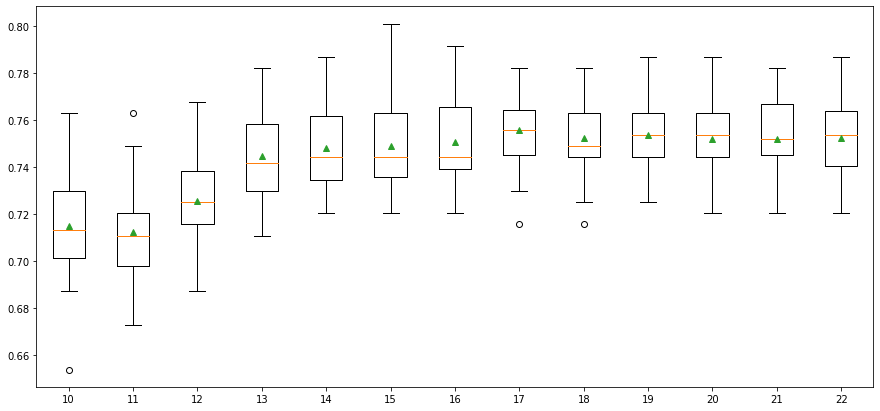

In [57]:
# plot model performance for comparison
plt.figure(figsize=(15,7))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Optimal number of features : 20


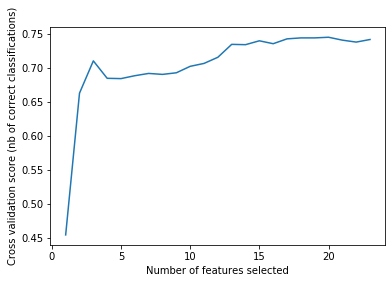

In [58]:
model = LogisticRegression(solver='liblinear',multi_class="auto")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(10), 
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [59]:
print("Num Features: %d" % rfecv.n_features_)
print("Selected Features:\n %s " % X.loc[:,rfecv.support_].columns)
print("Feature Ranking:\n %s" % rfecv.ranking_)
X_opt=X.loc[:,rfecv.support_]

Num Features: 20
Selected Features:
 Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'Gender_Male',
       'family_history_with_overweight_yes', 'FAVC_yes', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'SCC_yes', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object') 
Feature Ranking:
 [1 1 1 1 1 1 1 3 1 1 1 1 1 1 2 1 1 1 1 1 4 1 1]


In [60]:
X_opt.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.522124,-0.875589,-0.862503,-0.785019,0.404153,-0.013073,-1.187869,-1.011914,0.472291,-2.759769,-0.358994,0.441992,-0.157344,-0.218272,-0.185194,-1.404720,1.517761,-0.05768,0.579721,-0.165078
1,-0.522124,-1.947599,-1.168066,1.088342,0.404153,1.618759,2.341053,-1.011914,0.472291,-2.759769,-0.358994,0.441992,-0.157344,4.581439,-0.185194,0.711885,-0.658865,-0.05768,0.579721,-0.165078
2,-0.206889,1.054029,-0.365964,-0.785019,0.404153,-0.013073,1.164746,0.988227,0.472291,-2.759769,-0.358994,0.441992,-0.157344,-0.218272,5.399735,-1.404720,-0.658865,-0.05768,0.579721,-0.165078
3,0.423582,1.054029,0.015989,1.088342,0.404153,-0.013073,1.164746,0.988227,-2.117337,-2.759769,-0.358994,0.441992,-0.157344,-0.218272,5.399735,-1.404720,-0.658865,-0.05768,-1.724969,6.057758
4,-0.364507,0.839627,0.122935,-0.785019,-2.167023,-0.013073,-1.187869,0.988227,-2.117337,-2.759769,-0.358994,0.441992,-0.157344,-0.218272,-0.185194,0.711885,-0.658865,-0.05768,0.579721,-0.165078


# Finding the best model with best parameters using GridSearchCV

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size=0.20)

In [62]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [63]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [5,10,20,50],
            "criterion":['gini','entropy'],
            'min_samples_split':[2,3,4],
            
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,20]
        }
    },
 
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    },
     
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [x for x in range(5,20)],
            'leaf_size':[10,20,30,40,50,60],
        }
    }  
}

In [64]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False,verbose=10,n_jobs=1)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
model_results = pd.DataFrame(scores,columns=['model','best_score','best_params'])


Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.834, total=   0.2s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.893, total=   0.2s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.876, total=   0.2s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.905, total=   0.2s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.834, total=   0.2s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.858, total=   0.2s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.864, total=   0.2s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.1s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.840, total=   0.2s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.851, total=   0.2s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.4s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.827, total=   0.2s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.953, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.959, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.941, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.964, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.959, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.923, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   11.5s finished


Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] criterion=gini, min_samples_split=2, n_estimators=5 .............
[CV]  criterion=gini, min_samples_split=2, n_estimators=5, score=0.840, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=5 .............
[CV]  criterion=gini, min_samples_split=2, n_estimators=5, score=0.899, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=5 .............
[CV]  criterion=gini, min_samples_split=2, n_estimators=5, score=0.929, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=5 .............
[CV]  criterion=gini, min_samples_split=2, n_estimators=5, score=0.941, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=5 .............
[CV]  criterion=gini, min_samples_split=2, n_estimators=5, score=0.905, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=5 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=2, n_estimators=5, score=0.870, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=5 .............
[CV]  criterion=gini, min_samples_split=2, n_estimators=5, score=0.882, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=5 .............
[CV]  criterion=gini, min_samples_split=2, n_estimators=5, score=0.858, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=5 .............
[CV]  criterion=gini, min_samples_split=2, n_estimators=5, score=0.875, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=5 .............
[CV]  criterion=gini, min_samples_split=2, n_estimators=5, score=0.905, total=   0.0s
[CV] criterion=gini, min_samples_split=2, n_estimators=10 ............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, min_samples_split=2, n_estimators=10, score=0.888, total=   0.1s
[CV] criterion=gini, min_samples_split=2, n_estimators=10 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=10, score=0.917, total=   0.1s
[CV] criterion=gini, min_samples_split=2, n_estimators=10 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=10, score=0.905, total=   0.1s
[CV] criterion=gini, min_samples_split=2, n_estimators=10 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=10, score=0.953, total=   0.1s
[CV] criterion=gini, min_samples_split=2, n_estimators=10 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=10, score=0.905, total=   0.1s
[CV] criterion=gini, min_samples_split=2, n_estimators=10 ............
[CV]  criterion=gini, min_samples_split=2, n_estimators=10, score=0.947, total=   0.1s
[CV] criterion=gini, min_samples_split=2, n_estimators=10 ............
[CV]  criterion=gini, min_samples_split=2, n_estimat

[CV]  criterion=gini, min_samples_split=3, n_estimators=20, score=0.935, total=   0.1s
[CV] criterion=gini, min_samples_split=3, n_estimators=20 ............
[CV]  criterion=gini, min_samples_split=3, n_estimators=20, score=0.953, total=   0.1s
[CV] criterion=gini, min_samples_split=3, n_estimators=20 ............
[CV]  criterion=gini, min_samples_split=3, n_estimators=20, score=0.941, total=   0.1s
[CV] criterion=gini, min_samples_split=3, n_estimators=20 ............
[CV]  criterion=gini, min_samples_split=3, n_estimators=20, score=0.935, total=   0.1s
[CV] criterion=gini, min_samples_split=3, n_estimators=20 ............
[CV]  criterion=gini, min_samples_split=3, n_estimators=20, score=0.964, total=   0.1s
[CV] criterion=gini, min_samples_split=3, n_estimators=20 ............
[CV]  criterion=gini, min_samples_split=3, n_estimators=20, score=0.923, total=   0.1s
[CV] criterion=gini, min_samples_split=3, n_estimators=20 ............
[CV]  criterion=gini, min_samples_split=3, n_estimat

[CV]  criterion=gini, min_samples_split=4, n_estimators=50, score=0.935, total=   0.2s
[CV] criterion=gini, min_samples_split=4, n_estimators=50 ............
[CV]  criterion=gini, min_samples_split=4, n_estimators=50, score=0.970, total=   0.2s
[CV] criterion=gini, min_samples_split=4, n_estimators=50 ............
[CV]  criterion=gini, min_samples_split=4, n_estimators=50, score=0.941, total=   0.2s
[CV] criterion=gini, min_samples_split=4, n_estimators=50 ............
[CV]  criterion=gini, min_samples_split=4, n_estimators=50, score=0.940, total=   0.2s
[CV] criterion=gini, min_samples_split=4, n_estimators=50 ............
[CV]  criterion=gini, min_samples_split=4, n_estimators=50, score=0.929, total=   0.2s
[CV] criterion=entropy, min_samples_split=2, n_estimators=5 ..........
[CV]  criterion=entropy, min_samples_split=2, n_estimators=5, score=0.864, total=   0.0s
[CV] criterion=entropy, min_samples_split=2, n_estimators=5 ..........
[CV]  criterion=entropy, min_samples_split=2, n_es

[CV]  criterion=entropy, min_samples_split=3, n_estimators=10, score=0.905, total=   0.1s
[CV] criterion=entropy, min_samples_split=3, n_estimators=10 .........
[CV]  criterion=entropy, min_samples_split=3, n_estimators=10, score=0.959, total=   0.1s
[CV] criterion=entropy, min_samples_split=3, n_estimators=10 .........
[CV]  criterion=entropy, min_samples_split=3, n_estimators=10, score=0.929, total=   0.1s
[CV] criterion=entropy, min_samples_split=3, n_estimators=10 .........
[CV]  criterion=entropy, min_samples_split=3, n_estimators=10, score=0.947, total=   0.1s
[CV] criterion=entropy, min_samples_split=3, n_estimators=10 .........
[CV]  criterion=entropy, min_samples_split=3, n_estimators=10, score=0.917, total=   0.1s
[CV] criterion=entropy, min_samples_split=3, n_estimators=10 .........
[CV]  criterion=entropy, min_samples_split=3, n_estimators=10, score=0.905, total=   0.1s
[CV] criterion=entropy, min_samples_split=3, n_estimators=10 .........
[CV]  criterion=entropy, min_sampl

[CV]  criterion=entropy, min_samples_split=4, n_estimators=20, score=0.953, total=   0.1s
[CV] criterion=entropy, min_samples_split=4, n_estimators=20 .........
[CV]  criterion=entropy, min_samples_split=4, n_estimators=20, score=0.959, total=   0.1s
[CV] criterion=entropy, min_samples_split=4, n_estimators=20 .........
[CV]  criterion=entropy, min_samples_split=4, n_estimators=20, score=0.959, total=   0.1s
[CV] criterion=entropy, min_samples_split=4, n_estimators=20 .........
[CV]  criterion=entropy, min_samples_split=4, n_estimators=20, score=0.947, total=   0.1s
[CV] criterion=entropy, min_samples_split=4, n_estimators=20 .........
[CV]  criterion=entropy, min_samples_split=4, n_estimators=20, score=0.970, total=   0.1s
[CV] criterion=entropy, min_samples_split=4, n_estimators=20 .........
[CV]  criterion=entropy, min_samples_split=4, n_estimators=20, score=0.941, total=   0.1s
[CV] criterion=entropy, min_samples_split=4, n_estimators=20 .........
[CV]  criterion=entropy, min_sampl

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   30.6s finished


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.757, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.740, total=   0.1s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ................................. C=1, score=0.740, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.716, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.710, total=   0.1s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s


[CV] ................................. C=1, score=0.751, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.734, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.793, total=   0.1s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.6s remaining:    0.0s


[CV] ................................. C=1, score=0.738, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.774, total=   0.1s
[CV] C=5 .............................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s remaining:    0.0s


[CV] ................................. C=5, score=0.763, total=   0.1s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.775, total=   0.1s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.763, total=   0.1s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.740, total=   0.1s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.746, total=   0.1s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.769, total=   0.1s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.775, total=   0.1s
[CV] C=5 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.964, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.941, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.959, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.941, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.923, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.911, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s


[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.941, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.935, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.946, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ................... criterion=entropy, score=0.941, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ................... criterion=entropy, score=0.953, total=   0.0s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


[CV] criterion=entropy ...............................................
[CV] ................... criterion=entropy, score=0.911, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ................... criterion=entropy, score=0.923, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ................... criterion=entropy, score=0.941, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ................... criterion=entropy, score=0.876, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ................... criterion=entropy, score=0.959, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ................... criterion=entropy, score=0.964, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ................... criterion=entropy, score=0.917, total=   0.0s
[CV] c

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... leaf_size=10, n_neighbors=5, score=0.805, total=   0.1s
[CV] leaf_size=10, n_neighbors=5 .....................................
[CV] ......... leaf_size=10, n_neighbors=5, score=0.793, total=   0.1s
[CV] leaf_size=10, n_neighbors=5 .....................................
[CV] ......... leaf_size=10, n_neighbors=5, score=0.757, total=   0.1s
[CV] leaf_size=10, n_neighbors=5 .....................................
[CV] ......... leaf_size=10, n_neighbors=5, score=0.769, total=   0.1s
[CV] leaf_size=10, n_neighbors=5 .....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s


[CV] ......... leaf_size=10, n_neighbors=5, score=0.805, total=   0.1s
[CV] leaf_size=10, n_neighbors=5 .....................................
[CV] ......... leaf_size=10, n_neighbors=5, score=0.763, total=   0.1s
[CV] leaf_size=10, n_neighbors=5 .....................................
[CV] ......... leaf_size=10, n_neighbors=5, score=0.792, total=   0.1s
[CV] leaf_size=10, n_neighbors=5 .....................................
[CV] ......... leaf_size=10, n_neighbors=5, score=0.774, total=   0.1s
[CV] leaf_size=10, n_neighbors=6 .....................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s remaining:    0.0s


[CV] ......... leaf_size=10, n_neighbors=6, score=0.793, total=   0.1s
[CV] leaf_size=10, n_neighbors=6 .....................................
[CV] ......... leaf_size=10, n_neighbors=6, score=0.828, total=   0.1s
[CV] leaf_size=10, n_neighbors=6 .....................................
[CV] ......... leaf_size=10, n_neighbors=6, score=0.817, total=   0.1s
[CV] leaf_size=10, n_neighbors=6 .....................................
[CV] ......... leaf_size=10, n_neighbors=6, score=0.817, total=   0.1s
[CV] leaf_size=10, n_neighbors=6 .....................................
[CV] ......... leaf_size=10, n_neighbors=6, score=0.740, total=   0.1s
[CV] leaf_size=10, n_neighbors=6 .....................................
[CV] ......... leaf_size=10, n_neighbors=6, score=0.746, total=   0.1s
[CV] leaf_size=10, n_neighbors=6 .....................................
[CV] ......... leaf_size=10, n_neighbors=6, score=0.787, total=   0.1s
[CV] leaf_size=10, n_neighbors=6 .....................................
[CV] .

[CV] ........ leaf_size=10, n_neighbors=11, score=0.762, total=   0.1s
[CV] leaf_size=10, n_neighbors=12 ....................................
[CV] ........ leaf_size=10, n_neighbors=12, score=0.769, total=   0.1s
[CV] leaf_size=10, n_neighbors=12 ....................................
[CV] ........ leaf_size=10, n_neighbors=12, score=0.799, total=   0.1s
[CV] leaf_size=10, n_neighbors=12 ....................................
[CV] ........ leaf_size=10, n_neighbors=12, score=0.740, total=   0.1s
[CV] leaf_size=10, n_neighbors=12 ....................................
[CV] ........ leaf_size=10, n_neighbors=12, score=0.799, total=   0.1s
[CV] leaf_size=10, n_neighbors=12 ....................................
[CV] ........ leaf_size=10, n_neighbors=12, score=0.698, total=   0.1s
[CV] leaf_size=10, n_neighbors=12 ....................................
[CV] ........ leaf_size=10, n_neighbors=12, score=0.746, total=   0.1s
[CV] leaf_size=10, n_neighbors=12 ....................................
[CV] .

[CV] ........ leaf_size=10, n_neighbors=17, score=0.710, total=   0.1s
[CV] leaf_size=10, n_neighbors=17 ....................................
[CV] ........ leaf_size=10, n_neighbors=17, score=0.726, total=   0.1s
[CV] leaf_size=10, n_neighbors=17 ....................................
[CV] ........ leaf_size=10, n_neighbors=17, score=0.732, total=   0.1s
[CV] leaf_size=10, n_neighbors=18 ....................................
[CV] ........ leaf_size=10, n_neighbors=18, score=0.763, total=   0.1s
[CV] leaf_size=10, n_neighbors=18 ....................................
[CV] ........ leaf_size=10, n_neighbors=18, score=0.757, total=   0.1s
[CV] leaf_size=10, n_neighbors=18 ....................................
[CV] ........ leaf_size=10, n_neighbors=18, score=0.669, total=   0.1s
[CV] leaf_size=10, n_neighbors=18 ....................................
[CV] ........ leaf_size=10, n_neighbors=18, score=0.746, total=   0.1s
[CV] leaf_size=10, n_neighbors=18 ....................................
[CV] .

[CV] ......... leaf_size=20, n_neighbors=8, score=0.763, total=   0.1s
[CV] leaf_size=20, n_neighbors=8 .....................................
[CV] ......... leaf_size=20, n_neighbors=8, score=0.757, total=   0.1s
[CV] leaf_size=20, n_neighbors=8 .....................................
[CV] ......... leaf_size=20, n_neighbors=8, score=0.769, total=   0.1s
[CV] leaf_size=20, n_neighbors=8 .....................................
[CV] ......... leaf_size=20, n_neighbors=8, score=0.750, total=   0.1s
[CV] leaf_size=20, n_neighbors=8 .....................................
[CV] ......... leaf_size=20, n_neighbors=8, score=0.756, total=   0.1s
[CV] leaf_size=20, n_neighbors=9 .....................................
[CV] ......... leaf_size=20, n_neighbors=9, score=0.787, total=   0.1s
[CV] leaf_size=20, n_neighbors=9 .....................................
[CV] ......... leaf_size=20, n_neighbors=9, score=0.799, total=   0.1s
[CV] leaf_size=20, n_neighbors=9 .....................................
[CV] .

[CV] ........ leaf_size=20, n_neighbors=14, score=0.728, total=   0.1s
[CV] leaf_size=20, n_neighbors=14 ....................................
[CV] ........ leaf_size=20, n_neighbors=14, score=0.751, total=   0.1s
[CV] leaf_size=20, n_neighbors=14 ....................................
[CV] ........ leaf_size=20, n_neighbors=14, score=0.734, total=   0.1s
[CV] leaf_size=20, n_neighbors=14 ....................................
[CV] ........ leaf_size=20, n_neighbors=14, score=0.726, total=   0.1s
[CV] leaf_size=20, n_neighbors=14 ....................................
[CV] ........ leaf_size=20, n_neighbors=14, score=0.750, total=   0.1s
[CV] leaf_size=20, n_neighbors=15 ....................................
[CV] ........ leaf_size=20, n_neighbors=15, score=0.757, total=   0.1s
[CV] leaf_size=20, n_neighbors=15 ....................................
[CV] ........ leaf_size=20, n_neighbors=15, score=0.781, total=   0.1s
[CV] leaf_size=20, n_neighbors=15 ....................................
[CV] .

[CV] ......... leaf_size=30, n_neighbors=5, score=0.769, total=   0.0s
[CV] leaf_size=30, n_neighbors=5 .....................................
[CV] ......... leaf_size=30, n_neighbors=5, score=0.805, total=   0.0s
[CV] leaf_size=30, n_neighbors=5 .....................................
[CV] ......... leaf_size=30, n_neighbors=5, score=0.763, total=   0.0s
[CV] leaf_size=30, n_neighbors=5 .....................................
[CV] ......... leaf_size=30, n_neighbors=5, score=0.792, total=   0.1s
[CV] leaf_size=30, n_neighbors=5 .....................................
[CV] ......... leaf_size=30, n_neighbors=5, score=0.774, total=   0.0s
[CV] leaf_size=30, n_neighbors=6 .....................................
[CV] ......... leaf_size=30, n_neighbors=6, score=0.793, total=   0.1s
[CV] leaf_size=30, n_neighbors=6 .....................................
[CV] ......... leaf_size=30, n_neighbors=6, score=0.828, total=   0.0s
[CV] leaf_size=30, n_neighbors=6 .....................................
[CV] .

[CV] ........ leaf_size=30, n_neighbors=11, score=0.740, total=   0.1s
[CV] leaf_size=30, n_neighbors=11 ....................................
[CV] ........ leaf_size=30, n_neighbors=11, score=0.775, total=   0.0s
[CV] leaf_size=30, n_neighbors=11 ....................................
[CV] ........ leaf_size=30, n_neighbors=11, score=0.769, total=   0.0s
[CV] leaf_size=30, n_neighbors=11 ....................................
[CV] ........ leaf_size=30, n_neighbors=11, score=0.738, total=   0.0s
[CV] leaf_size=30, n_neighbors=11 ....................................
[CV] ........ leaf_size=30, n_neighbors=11, score=0.762, total=   0.1s
[CV] leaf_size=30, n_neighbors=12 ....................................
[CV] ........ leaf_size=30, n_neighbors=12, score=0.769, total=   0.1s
[CV] leaf_size=30, n_neighbors=12 ....................................
[CV] ........ leaf_size=30, n_neighbors=12, score=0.799, total=   0.0s
[CV] leaf_size=30, n_neighbors=12 ....................................
[CV] .

[CV] ........ leaf_size=30, n_neighbors=17, score=0.692, total=   0.1s
[CV] leaf_size=30, n_neighbors=17 ....................................
[CV] ........ leaf_size=30, n_neighbors=17, score=0.728, total=   0.0s
[CV] leaf_size=30, n_neighbors=17 ....................................
[CV] ........ leaf_size=30, n_neighbors=17, score=0.710, total=   0.0s
[CV] leaf_size=30, n_neighbors=17 ....................................
[CV] ........ leaf_size=30, n_neighbors=17, score=0.726, total=   0.1s
[CV] leaf_size=30, n_neighbors=17 ....................................
[CV] ........ leaf_size=30, n_neighbors=17, score=0.732, total=   0.0s
[CV] leaf_size=30, n_neighbors=18 ....................................
[CV] ........ leaf_size=30, n_neighbors=18, score=0.763, total=   0.1s
[CV] leaf_size=30, n_neighbors=18 ....................................
[CV] ........ leaf_size=30, n_neighbors=18, score=0.757, total=   0.0s
[CV] leaf_size=30, n_neighbors=18 ....................................
[CV] .

[CV] ......... leaf_size=40, n_neighbors=8, score=0.757, total=   0.0s
[CV] leaf_size=40, n_neighbors=8 .....................................
[CV] ......... leaf_size=40, n_neighbors=8, score=0.769, total=   0.0s
[CV] leaf_size=40, n_neighbors=8 .....................................
[CV] ......... leaf_size=40, n_neighbors=8, score=0.750, total=   0.0s
[CV] leaf_size=40, n_neighbors=8 .....................................
[CV] ......... leaf_size=40, n_neighbors=8, score=0.756, total=   0.0s
[CV] leaf_size=40, n_neighbors=9 .....................................
[CV] ......... leaf_size=40, n_neighbors=9, score=0.787, total=   0.0s
[CV] leaf_size=40, n_neighbors=9 .....................................
[CV] ......... leaf_size=40, n_neighbors=9, score=0.799, total=   0.0s
[CV] leaf_size=40, n_neighbors=9 .....................................
[CV] ......... leaf_size=40, n_neighbors=9, score=0.751, total=   0.0s
[CV] leaf_size=40, n_neighbors=9 .....................................
[CV] .

[CV] ........ leaf_size=40, n_neighbors=14, score=0.734, total=   0.0s
[CV] leaf_size=40, n_neighbors=14 ....................................
[CV] ........ leaf_size=40, n_neighbors=14, score=0.726, total=   0.1s
[CV] leaf_size=40, n_neighbors=14 ....................................
[CV] ........ leaf_size=40, n_neighbors=14, score=0.750, total=   0.0s
[CV] leaf_size=40, n_neighbors=15 ....................................
[CV] ........ leaf_size=40, n_neighbors=15, score=0.757, total=   0.0s
[CV] leaf_size=40, n_neighbors=15 ....................................
[CV] ........ leaf_size=40, n_neighbors=15, score=0.781, total=   0.0s
[CV] leaf_size=40, n_neighbors=15 ....................................
[CV] ........ leaf_size=40, n_neighbors=15, score=0.716, total=   0.1s
[CV] leaf_size=40, n_neighbors=15 ....................................
[CV] ........ leaf_size=40, n_neighbors=15, score=0.769, total=   0.1s
[CV] leaf_size=40, n_neighbors=15 ....................................
[CV] .

[CV] ......... leaf_size=50, n_neighbors=5, score=0.763, total=   0.0s
[CV] leaf_size=50, n_neighbors=5 .....................................
[CV] ......... leaf_size=50, n_neighbors=5, score=0.792, total=   0.0s
[CV] leaf_size=50, n_neighbors=5 .....................................
[CV] ......... leaf_size=50, n_neighbors=5, score=0.774, total=   0.0s
[CV] leaf_size=50, n_neighbors=6 .....................................
[CV] ......... leaf_size=50, n_neighbors=6, score=0.793, total=   0.0s
[CV] leaf_size=50, n_neighbors=6 .....................................
[CV] ......... leaf_size=50, n_neighbors=6, score=0.828, total=   0.0s
[CV] leaf_size=50, n_neighbors=6 .....................................
[CV] ......... leaf_size=50, n_neighbors=6, score=0.817, total=   0.0s
[CV] leaf_size=50, n_neighbors=6 .....................................
[CV] ......... leaf_size=50, n_neighbors=6, score=0.817, total=   0.0s
[CV] leaf_size=50, n_neighbors=6 .....................................
[CV] .

[CV] ........ leaf_size=50, n_neighbors=11, score=0.769, total=   0.0s
[CV] leaf_size=50, n_neighbors=11 ....................................
[CV] ........ leaf_size=50, n_neighbors=11, score=0.738, total=   0.1s
[CV] leaf_size=50, n_neighbors=11 ....................................
[CV] ........ leaf_size=50, n_neighbors=11, score=0.762, total=   0.0s
[CV] leaf_size=50, n_neighbors=12 ....................................
[CV] ........ leaf_size=50, n_neighbors=12, score=0.769, total=   0.0s
[CV] leaf_size=50, n_neighbors=12 ....................................
[CV] ........ leaf_size=50, n_neighbors=12, score=0.799, total=   0.0s
[CV] leaf_size=50, n_neighbors=12 ....................................
[CV] ........ leaf_size=50, n_neighbors=12, score=0.740, total=   0.0s
[CV] leaf_size=50, n_neighbors=12 ....................................
[CV] ........ leaf_size=50, n_neighbors=12, score=0.799, total=   0.0s
[CV] leaf_size=50, n_neighbors=12 ....................................
[CV] .

[CV] ........ leaf_size=50, n_neighbors=17, score=0.692, total=   0.0s
[CV] leaf_size=50, n_neighbors=17 ....................................
[CV] ........ leaf_size=50, n_neighbors=17, score=0.728, total=   0.0s
[CV] leaf_size=50, n_neighbors=17 ....................................
[CV] ........ leaf_size=50, n_neighbors=17, score=0.710, total=   0.0s
[CV] leaf_size=50, n_neighbors=17 ....................................
[CV] ........ leaf_size=50, n_neighbors=17, score=0.726, total=   0.0s
[CV] leaf_size=50, n_neighbors=17 ....................................
[CV] ........ leaf_size=50, n_neighbors=17, score=0.732, total=   0.0s
[CV] leaf_size=50, n_neighbors=18 ....................................
[CV] ........ leaf_size=50, n_neighbors=18, score=0.763, total=   0.0s
[CV] leaf_size=50, n_neighbors=18 ....................................
[CV] ........ leaf_size=50, n_neighbors=18, score=0.757, total=   0.0s
[CV] leaf_size=50, n_neighbors=18 ....................................
[CV] .

[CV] ......... leaf_size=60, n_neighbors=8, score=0.757, total=   0.0s
[CV] leaf_size=60, n_neighbors=8 .....................................
[CV] ......... leaf_size=60, n_neighbors=8, score=0.769, total=   0.0s
[CV] leaf_size=60, n_neighbors=8 .....................................
[CV] ......... leaf_size=60, n_neighbors=8, score=0.750, total=   0.0s
[CV] leaf_size=60, n_neighbors=8 .....................................
[CV] ......... leaf_size=60, n_neighbors=8, score=0.756, total=   0.0s
[CV] leaf_size=60, n_neighbors=9 .....................................
[CV] ......... leaf_size=60, n_neighbors=9, score=0.787, total=   0.0s
[CV] leaf_size=60, n_neighbors=9 .....................................
[CV] ......... leaf_size=60, n_neighbors=9, score=0.799, total=   0.0s
[CV] leaf_size=60, n_neighbors=9 .....................................
[CV] ......... leaf_size=60, n_neighbors=9, score=0.751, total=   0.0s
[CV] leaf_size=60, n_neighbors=9 .....................................
[CV] .

[CV] ........ leaf_size=60, n_neighbors=14, score=0.751, total=   0.0s
[CV] leaf_size=60, n_neighbors=14 ....................................
[CV] ........ leaf_size=60, n_neighbors=14, score=0.734, total=   0.0s
[CV] leaf_size=60, n_neighbors=14 ....................................
[CV] ........ leaf_size=60, n_neighbors=14, score=0.726, total=   0.0s
[CV] leaf_size=60, n_neighbors=14 ....................................
[CV] ........ leaf_size=60, n_neighbors=14, score=0.750, total=   0.0s
[CV] leaf_size=60, n_neighbors=15 ....................................
[CV] ........ leaf_size=60, n_neighbors=15, score=0.757, total=   0.0s
[CV] leaf_size=60, n_neighbors=15 ....................................
[CV] ........ leaf_size=60, n_neighbors=15, score=0.781, total=   0.0s
[CV] leaf_size=60, n_neighbors=15 ....................................
[CV] ........ leaf_size=60, n_neighbors=15, score=0.716, total=   0.0s
[CV] leaf_size=60, n_neighbors=15 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   49.3s finished


In [65]:
model_results

,model,best_score,best_params
0,svm,0.963264,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.947873,"{'criterion': 'entropy', 'min_samples_split': ..."
2,logistic_regression,0.776074,{'C': 20}
3,decision_tree,0.941941,{'criterion': 'gini'}
4,KNN,0.789684,"{'leaf_size': 10, 'n_neighbors': 5}"


# Finding the best train-test split using Bias Variance Tradeoff

In [66]:
from sklearn.model_selection import train_test_split

In [83]:
train_score=[]
test_score=[]
splits = []
svc_bvt=svm.SVC(C=20,kernel="linear",gamma="auto")
for i in range(0,30):
    X_train_bvt, X_test_bvt, y_train_bvt, y_test_bvt = train_test_split(X_opt, y, test_size=0.20,shuffle=True)
    svc_bvt.fit(X_train_bvt,y_train_bvt)
    splits.append({
        "X_train":X_train_bvt,
        "X_test":X_test_bvt,
        "y_train":y_train_bvt,
        "y_test":y_test_bvt})
    train_score.append(1 - svc_bvt.score(X_train_bvt,y_train_bvt))
    test_score.append(1 - svc_bvt.score(X_test_bvt,y_test_bvt))

Text(0.5, 1.0, 'Bias Variance Trade-off Graph')

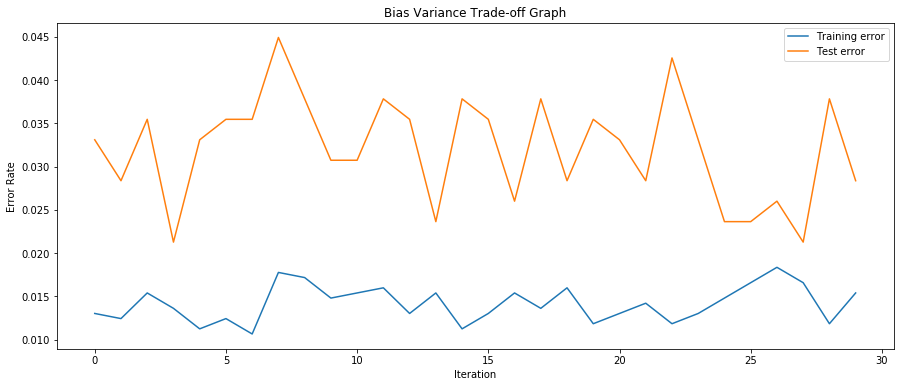

In [84]:
plt.figure(figsize=(15,6))
plt.plot(range(0,30),train_score,label="Training error")
plt.plot(range(0,30),test_score,label="Test error")
plt.xlabel("Iteration")
plt.ylabel("Error Rate")
plt.legend(loc="best")
plt.title("Bias Variance Trade-off Graph")

In [89]:
diff=abs(np.array(train_score)-np.array(test_score))
best_split_index = np.argmin(diff)
best_split=splits[best_split_index]
X_train = best_split["X_train"]
X_test = best_split["X_test"]
y_train = best_split["y_train"]
y_test = best_split["y_test"]

# Fitting the best model with best parameters and best data split

In [90]:
svc = svm.SVC(C=20,kernel="linear",gamma="auto")

In [91]:
svc.fit(X_train,y_train)

SVC(C=20, gamma='auto', kernel='linear')

In [92]:
y_pred = svc.predict(X_test)
y_score = svc.decision_function(X_test)

# Model Evaluation 

In [93]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report:\n" , classification_report(y_pred,y_test))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.99      0.99      0.99        68
           2       0.98      0.98      0.98        65
           3       1.00      0.98      0.99        63
           4       0.98      1.00      0.99        58
           5       0.94      0.98      0.96        64
           6       0.96      0.92      0.94        53

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423



In [94]:
X_train.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'Gender_Male',
       'family_history_with_overweight_yes', 'FAVC_yes', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'SCC_yes', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [95]:
from sklearn.inspection import permutation_importance

Confusion matrix, without normalization
    0   1   2   3   4   5   6
0  51   0   0   0   0   0   0
1   1  67   0   0   0   0   0
2   0   0  64   0   0   0   1
3   0   0   0  62   0   0   0
4   0   0   0   1  58   0   0
5   0   1   0   0   0  63   3
6   0   0   1   0   0   1  49
Normalized confusion matrix
          0         1         2         3         4         5         6
0  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1  0.014706  0.985294  0.000000  0.000000  0.000000  0.000000  0.000000
2  0.000000  0.000000  0.984615  0.000000  0.000000  0.000000  0.015385
3  0.000000  0.000000  0.000000  1.000000  0.000000  0.000000  0.000000
4  0.000000  0.000000  0.000000  0.016949  0.983051  0.000000  0.000000
5  0.000000  0.014925  0.000000  0.000000  0.000000  0.940299  0.044776
6  0.000000  0.000000  0.019608  0.000000  0.000000  0.019608  0.960784


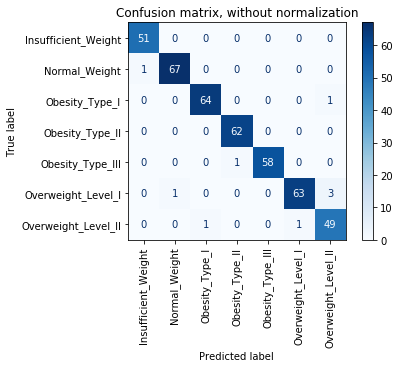

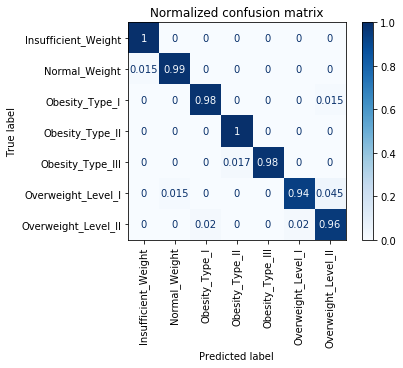

In [96]:
# Plot non-normalized confusion matrix
class_names = le.inverse_transform([0,1,2,3,4,5,6])
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    plt.xticks(rotation="vertical")

    print(title)
    print(pd.DataFrame(disp.confusion_matrix))

plt.show()

# Feature Importance evaluation 

In [97]:
from sklearn.inspection import permutation_importance
r = permutation_importance(svc, X_train, y_train,n_repeats=30,random_state=0)

In [98]:
print("FEATURE IMPORTANCES:")
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"{X_train.columns[i]:<35}:"
                 f"{r.importances_mean[i]*100:.2f}"
                    f" +/- {r.importances_std[i]:.3f}")

FEATURE IMPORTANCES:
Weight                             :77.78 +/- 0.007
Height                             :38.11 +/- 0.007
Gender_Male                        :13.94 +/- 0.006
Age                                :3.37 +/- 0.004
NCP                                :3.00 +/- 0.004
CAEC_Sometimes                     :2.41 +/- 0.002
MTRANS_Public_Transportation       :1.99 +/- 0.003
CAEC_Frequently                    :1.44 +/- 0.002
family_history_with_overweight_yes :1.29 +/- 0.003
SCC_yes                            :0.95 +/- 0.002
FCVC                               :0.66 +/- 0.002
FAF                                :0.63 +/- 0.002
CAEC_no                            :0.63 +/- 0.002
FAVC_yes                           :0.56 +/- 0.001
CALC_Frequently                    :0.36 +/- 0.001
CALC_no                            :0.27 +/- 0.001
MTRANS_Walking                     :0.19 +/- 0.001
CALC_Sometimes                     :0.16 +/- 0.001


# Cross Validation

In [99]:
from sklearn.model_selection import cross_validate

In [100]:
cv_results = cross_validate(svc, X_opt, y, cv=10)

In [101]:
print(pd.DataFrame(cv_results))

   fit_time  score_time  test_score
0  0.466751    0.007026    0.896226
1  0.316154    0.006982    0.905213
2  0.420874    0.008018    0.962085
3  0.397895    0.006982    0.966825
4  0.544543    0.006982    0.971564
5  0.375994    0.006981    1.000000
6  0.359081    0.006986    0.985782
7  0.506931    0.008653    0.985782
8  0.398286    0.006980    0.985782
9  0.356817    0.006991    0.976303


The average Cross validation score is 0.9635562907985333


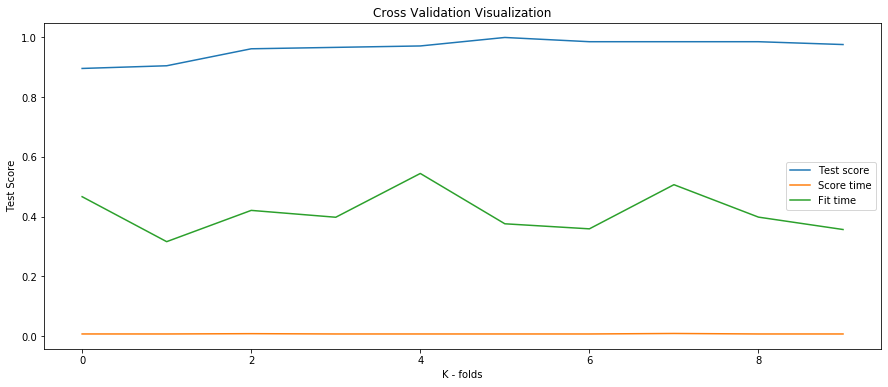

In [102]:
print("The average Cross validation score is {}".format(np.mean(cv_results["test_score"])))
plt.figure(figsize=(15,6))
plt.plot(range(0,10),cv_results["test_score"],label="Test score")
plt.plot(range(0,10),cv_results["score_time"],label="Score time")
plt.plot(range(0,10),cv_results["fit_time"],label="Fit time")
plt.xlabel("K - folds")
plt.ylabel("Test Score")
plt.title("Cross Validation Visualization")
plt.legend(loc="best")